# Worksheet 02

Name: Grace Van Sciver 
UID: U05141982

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

The top down approach can be difficult to easily implement with languages such as python. 

b) What is a drawback of the bottom up approach?

It may not work in the end since you are developing small to large - the large components may fail and you have no way of predicting this. Can also be hard to plan and map out. 

c) What are 3 things you can do to have a better debugging experience?

1. Stay calm and dont panic
2. Read and understand the error to discover the issue
3. Race through your code and understand where the error is coming from

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [66]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/gracevansciver/Downloads/Data-Science-Fundamentals/lecture_02


In [67]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [74]:
empty_vals = df.isna().any(axis=1).sum()

print("There are " + str(empty_vals) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [76]:
df = df.dropna(thresh=200, axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [77]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [78]:
pattern = r'(?P<Last>[\w\-]+), (?P<Title>\w+)\. (?P<First>[\w]+)(?: (?P<Middle>[\w\s]+))?'
df[['Last Name', 'Title', 'First Name', 'Middle Name']] = df['Name'].str.extract(pattern)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William,Henry


f) Complete the code below to replace all missing ages with the average age

In [79]:
average_age = df['Age'].mean()
df['Age'].fillna(average_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William,Henry


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

One thing that I observe from the data and the bar chart is that the avergae age of theose who did not survive is slightly higher than that of those who did survive. This could be a result of the fact that younger passengers were more physically fit and were more capable to run/climb/swim to safety, and withstand the conditions. 

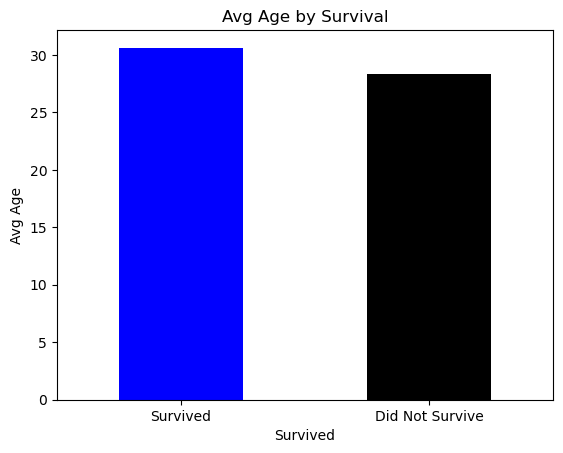

In [80]:
import matplotlib.pyplot as plt

avg_survival_age = df.groupby('Survived')['Age'].mean()

avg_survival_age.plot(kind='bar', color=['blue', 'black'])
plt.title('Avg Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Avg Age')
plt.xticks([0, 1], ['Survived', 'Did Not Survive'], rotation=0)
plt.show()